In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('lung_cancer_data.csv')

In [3]:
df.head()

,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,Patient0000,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,Patient0001,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,Patient0002,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,Patient0003,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,Patient0004,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


In [4]:
df.drop(['Ethnicity'], axis=1, inplace=True)
df.drop(['Insurance_Type'], axis=1, inplace=True)
df.drop(['Gender'], axis=1, inplace=True)
df.drop(['Patient_ID'], axis=1, inplace=True)

In [5]:
Categorical = ['Smoking_History','Tumor_Location','Stage','Treatment']
# 'Family_History','Comorbidity_Diabetes','Comorbidity_Hypertension','Comorbidity_Heart_Disease','Comorbidity_Chronic_Lung_Disease','Comorbidity_Kidney_Disease','Comorbidity_Autoimmune_Disease','Comorbidity_Other'
# #Initialize OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)
# # Apply one-hot encoding to the categorical columns
# one_hot_encoded = encoder.fit_transform(df[Categorical])
# #We use get_feature_names_out() to get the column names for the encoded data
# one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(Categorical))
# # Concatenate the one-hot encoded dataframe with the original dataframe
# df_encoded = pd.concat([df, one_hot_df], axis=1)

# # Drop the original categorical columns
# df_encoded = df_encoded.drop(Categorical, axis=1)
label_encoders = {}

for column in Categorical:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [6]:
choice = df[['Family_History','Comorbidity_Diabetes','Comorbidity_Hypertension','Comorbidity_Heart_Disease','Comorbidity_Chronic_Lung_Disease','Comorbidity_Kidney_Disease','Comorbidity_Autoimmune_Disease','Comorbidity_Other']]
for column in choice:
    choice[column] = choice[column].replace('Yes', 1)
    choice[column] = choice[column].replace('No', 0)

C:\Users\nm_ma\AppData\Local\Temp\ipykernel_21564\3531090914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choice[column] = choice[column].replace('Yes', 1)
C:\Users\nm_ma\AppData\Local\Temp\ipykernel_21564\3531090914.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choice[column] = choice[column].replace('No', 0)


In [7]:
df.drop(['Family_History','Comorbidity_Diabetes','Comorbidity_Hypertension','Comorbidity_Heart_Disease','Comorbidity_Chronic_Lung_Disease','Comorbidity_Kidney_Disease','Comorbidity_Autoimmune_Disease','Comorbidity_Other'], axis=1, inplace=True)
df=pd.concat([df, choice], axis=1)

In [8]:
df.head()

,Age,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Performance_Status,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Sodium_Level,Smoking_Pack_Years,Family_History,Comorbidity_Diabetes,Comorbidity_Hypertension,Comorbidity_Heart_Disease,Comorbidity_Chronic_Lung_Disease,Comorbidity_Kidney_Disease,Comorbidity_Autoimmune_Disease,Comorbidity_Other
0,68,0,81.678677,0,2,2,44,3,161,99,...,139.822861,17.006956,0,1,1,1,0,1,1,1
1,58,2,78.448272,0,0,1,101,4,101,91,...,135.449361,93.270893,1,1,1,0,0,1,1,0
2,44,1,67.714305,0,0,0,69,0,109,74,...,143.377155,70.348376,1,0,0,0,1,1,0,0
3,72,0,70.806008,0,2,0,95,1,103,85,...,138.586005,19.828128,1,1,0,1,0,1,1,0
4,37,2,87.272433,0,3,1,105,0,165,69,...,141.230724,81.047456,0,1,1,1,0,1,0,0


In [9]:
corr_matrix = df.corr()
corr_matrix['Stage'].sort_values(ascending=False)

Stage                               1.000000
Tumor_Location                      0.013032
Sodium_Level                        0.009387
Comorbidity_Heart_Disease           0.007746
Age                                 0.006894
Albumin_Level                       0.006026
Survival_Months                     0.005474
Family_History                      0.004662
Phosphorus_Level                    0.003144
Performance_Status                  0.002454
Smoking_Pack_Years                  0.002081
LDH_Level                           0.001566
Treatment                           0.001412
Alanine_Aminotransferase_Level      0.000893
Smoking_History                     0.000707
White_Blood_Cell_Count              0.000348
Alkaline_Phosphatase_Level         -0.000143
Aspartate_Aminotransferase_Level   -0.000644
Hemoglobin_Level                   -0.000806
Platelet_Count                     -0.000994
Comorbidity_Chronic_Lung_Disease   -0.001626
Tumor_Size_mm                      -0.001959
Blood_Pres

In [10]:
df.shape

(23658, 34)

In [11]:
# Define replacement values for each column
Stage_values = {'Stage': {2: 3, 0: 1,3:4,1:2}}

# Replace values in multiple columns
df.replace(Stage_values, inplace=True)
df.head()

,Age,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Performance_Status,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Sodium_Level,Smoking_Pack_Years,Family_History,Comorbidity_Diabetes,Comorbidity_Hypertension,Comorbidity_Heart_Disease,Comorbidity_Chronic_Lung_Disease,Comorbidity_Kidney_Disease,Comorbidity_Autoimmune_Disease,Comorbidity_Other
0,68,0,81.678677,0,3,2,44,3,161,99,...,139.822861,17.006956,0,1,1,1,0,1,1,1
1,58,2,78.448272,0,1,1,101,4,101,91,...,135.449361,93.270893,1,1,1,0,0,1,1,0
2,44,1,67.714305,0,1,0,69,0,109,74,...,143.377155,70.348376,1,0,0,0,1,1,0,0
3,72,0,70.806008,0,3,0,95,1,103,85,...,138.586005,19.828128,1,1,0,1,0,1,1,0
4,37,2,87.272433,0,4,1,105,0,165,69,...,141.230724,81.047456,0,1,1,1,0,1,0,0


<Axes: xlabel='Stage', ylabel='Age'>

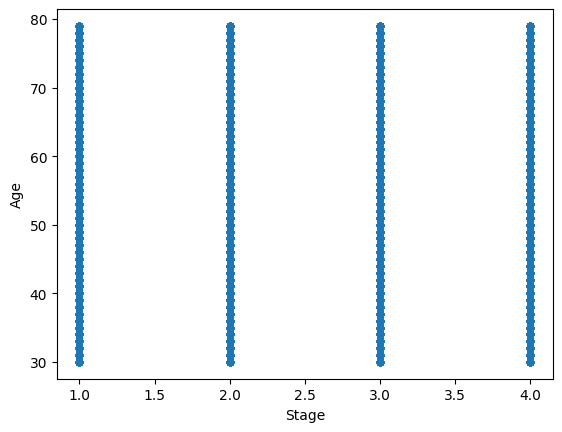

In [12]:
df.plot(kind="scatter", x="Stage", y="Age", alpha=1)

<Figure size 1000x600 with 0 Axes>

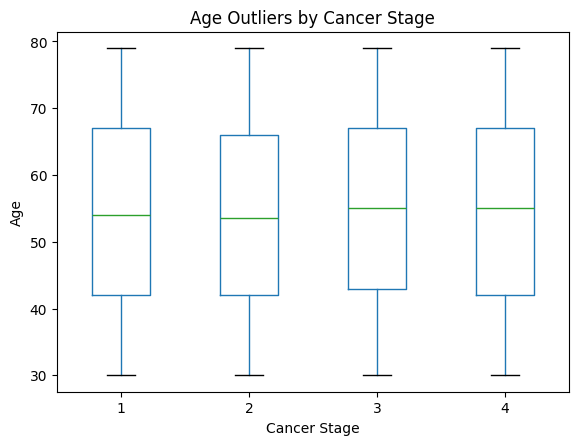

In [13]:
# Create boxplot
plt.figure(figsize=(10, 6))
df.boxplot(column='Age', by='Stage', grid=False)
plt.title('Age Outliers by Cancer Stage')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Cancer Stage')
plt.ylabel('Age')
plt.show()

In [14]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from the 'age' column
df= remove_outliers_iqr(df, 'Age')
print(df)

       Age  Smoking_History  Tumor_Size_mm  Tumor_Location  Stage  Treatment  \
0       68                0      81.678677               0      3          2   
1       58                2      78.448272               0      1          1   
2       44                1      67.714305               0      1          0   
3       72                0      70.806008               0      3          0   
4       37                2      87.272433               0      4          1   
...    ...              ...            ...             ...    ...        ...   
23653   45                1      91.279410               1      1          0   
23654   31                0      45.139048               2      4          1   
23655   74                1      89.640323               2      4          0   
23656   47                1      45.770358               1      1          1   
23657   64                1      13.460912               2      1          0   

       Survival_Months  Performance_Sta

In [15]:
df.shape 


(23658, 34)

In [16]:
data_scaling = pd.DataFrame(df[['Tumor_Size_mm','Survival_Months','Platelet_Count','Blood_Pressure_Systolic','Blood_Pressure_Pulse','Alkaline_Phosphatase_Level','LDH_Level','Glucose_Level','Sodium_Level','Smoking_Pack_Years']])
data_scaling

,Tumor_Size_mm,Survival_Months,Platelet_Count,Blood_Pressure_Systolic,Blood_Pressure_Pulse,Alkaline_Phosphatase_Level,LDH_Level,Glucose_Level,Sodium_Level,Smoking_Pack_Years
0,81.678677,44,321.735266,161,92,49.310048,239.240255,113.919243,139.822861,17.006956
1,78.448272,101,251.581538,101,93,111.421632,233.515237,101.321578,135.449361,93.270893
2,67.714305,69,393.456532,109,81,76.648006,169.037460,78.214177,143.377155,70.348376
3,70.806008,95,275.177898,103,68,81.952486,213.967590,127.895361,138.586005,19.828128
4,87.272433,105,381.705572,165,99,107.513423,118.187543,148.801185,141.230724,81.047456
...,...,...,...,...,...,...,...,...,...,...
23653,91.279410,16,357.180896,136,60,115.506310,203.209056,121.588210,138.004367,8.877173
23654,45.139048,81,448.588479,157,83,67.912406,245.095566,129.748104,137.883562,33.573249
23655,89.640323,52,341.790190,122,74,113.252605,214.793918,129.414306,138.813953,26.893648
23656,45.770358,26,163.957566,156,97,62.154204,138.947588,127.647028,139.706111,26.387602


In [17]:
df.drop(['Tumor_Size_mm','Survival_Months','Platelet_Count','Blood_Pressure_Systolic','Blood_Pressure_Pulse','Alkaline_Phosphatase_Level','LDH_Level','Glucose_Level','Sodium_Level','Smoking_Pack_Years'], axis=1, inplace=True)
df

,Age,Smoking_History,Tumor_Location,Stage,Treatment,Performance_Status,Blood_Pressure_Diastolic,Hemoglobin_Level,White_Blood_Cell_Count,Albumin_Level,...,Phosphorus_Level,Potassium_Level,Family_History,Comorbidity_Diabetes,Comorbidity_Hypertension,Comorbidity_Heart_Disease,Comorbidity_Chronic_Lung_Disease,Comorbidity_Kidney_Disease,Comorbidity_Autoimmune_Disease,Comorbidity_Other
0,68,0,0,3,2,3,99,13.538000,9.800707,3.568383,...,3.547734,4.968163,0,1,1,1,0,1,1,1
1,58,2,0,1,1,4,91,16.800312,4.378428,3.699357,...,2.945020,3.896795,1,1,1,0,0,1,1,0
2,44,1,0,1,0,0,74,14.473493,6.157792,4.708385,...,4.637399,4.369050,1,0,0,0,1,1,0,0
3,72,0,0,3,0,1,85,17.442063,6.259383,4.727672,...,3.617098,4.348474,1,1,0,1,0,1,1,0
4,37,2,0,4,1,0,69,13.545171,5.203516,4.605604,...,4.773255,3.671976,0,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23653,45,1,1,1,0,3,65,10.291070,5.424876,3.939470,...,3.083901,3.874261,0,0,1,0,0,0,1,0
23654,31,0,2,4,1,4,102,14.017448,8.688169,4.367993,...,4.571803,4.635774,0,1,1,0,0,1,0,1
23655,74,1,2,4,0,0,96,16.195201,3.903498,4.652690,...,4.877552,3.730363,1,1,1,1,0,1,1,0
23656,47,1,1,1,1,2,102,14.111498,9.096301,3.663111,...,2.885529,3.799932,0,1,0,0,0,0,1,1


In [18]:
data_scaling_col = list(data_scaling.columns)
print(data_scaling_col)

['Tumor_Size_mm', 'Survival_Months', 'Platelet_Count', 'Blood_Pressure_Systolic', 'Blood_Pressure_Pulse', 'Alkaline_Phosphatase_Level', 'LDH_Level', 'Glucose_Level', 'Sodium_Level', 'Smoking_Pack_Years']


In [19]:
data_scaling = np.array(data_scaling)
data_scaling

array([[ 81.67867748,  44.        , 321.7352659 , ..., 113.91924254,
        139.82286128,  17.00695611],
       [ 78.44827194, 101.        , 251.58153839, ..., 101.32157806,
        135.44936131,  93.27089292],
       [ 67.71430468,  69.        , 393.45653224, ...,  78.21417677,
        143.37715519,  70.3483763 ],
       ...,
       [ 89.64032274,  52.        , 341.79019045, ..., 129.41430632,
        138.8139526 ,  26.89364799],
       [ 45.77035786,  26.        , 163.95756648, ..., 127.64702797,
        139.70611133,  26.38760161],
       [ 13.46091189,   1.        , 390.22211568, ..., 114.73428488,
        135.2237019 ,  37.97254024]])

In [20]:
SC = StandardScaler()
data_scaling[:,:] = SC.fit_transform(data_scaling[:,:])
data_scaling

array([[ 1.01119592, -0.46324024,  0.25165545, ...,  0.17412049,
        -0.07094617, -1.1398082 ],
       [ 0.88696773,  1.20122088, -0.55567682, ..., -0.37102886,
        -1.58191167,  1.50179438],
       [ 0.47418324,  0.26678657,  1.07702702, ..., -1.37097491,
         1.15699839,  0.70781256],
       ...,
       [ 1.31736825, -0.22963166,  0.48244842, ...,  0.84465145,
        -0.41950595, -0.79735655],
       [-0.36969123, -0.98885954, -1.56405744, ...,  0.76817452,
        -0.11128117, -0.8148848 ],
       [-1.61218042, -1.71888635,  1.0398052 , ...,  0.20939051,
        -1.65987293, -0.4136099 ]])

In [21]:
data_scaling = pd.DataFrame(data_scaling,columns=data_scaling_col)
data_scaling

,Tumor_Size_mm,Survival_Months,Platelet_Count,Blood_Pressure_Systolic,Blood_Pressure_Pulse,Alkaline_Phosphatase_Level,LDH_Level,Glucose_Level,Sodium_Level,Smoking_Pack_Years
0,1.011196,-0.463240,0.251655,1.019895,1.075197,-0.991592,1.492148,0.174120,-0.070946,-1.139808
1,0.886968,1.201221,-0.555677,-1.286028,1.161803,1.403245,1.359717,-0.371029,-1.581912,1.501794
2,0.474183,0.266787,1.077027,-0.978572,0.122523,0.062478,-0.131786,-1.370975,1.156998,0.707813
3,0.593078,1.026014,-0.284129,-1.209164,-1.003365,0.267003,0.907540,0.778921,-0.498258,-1.042089
4,1.226309,1.318025,0.941796,1.173624,1.681444,1.252556,-1.308048,1.683596,0.415445,1.078403
...,...,...,...,...,...,...,...,...,...,...
23653,1.380401,-1.280870,0.659565,0.059094,-1.696219,1.560738,0.658673,0.505986,-0.699203,-1.421405
23654,-0.393969,0.617199,1.711488,0.866167,0.295736,-0.274341,1.627593,0.859096,-0.740939,-0.565991
23655,1.317368,-0.229632,0.482448,-0.478955,-0.483725,1.473841,0.926654,0.844651,-0.419506,-0.797357
23656,-0.369691,-0.988860,-1.564057,0.827735,1.508230,-0.496360,-0.827826,0.768175,-0.111281,-0.814885


In [22]:
df = pd.concat([df, data_scaling], axis=1)
df

,Age,Smoking_History,Tumor_Location,Stage,Treatment,Performance_Status,Blood_Pressure_Diastolic,Hemoglobin_Level,White_Blood_Cell_Count,Albumin_Level,...,Tumor_Size_mm,Survival_Months,Platelet_Count,Blood_Pressure_Systolic,Blood_Pressure_Pulse,Alkaline_Phosphatase_Level,LDH_Level,Glucose_Level,Sodium_Level,Smoking_Pack_Years
0,68,0,0,3,2,3,99,13.538000,9.800707,3.568383,...,1.011196,-0.463240,0.251655,1.019895,1.075197,-0.991592,1.492148,0.174120,-0.070946,-1.139808
1,58,2,0,1,1,4,91,16.800312,4.378428,3.699357,...,0.886968,1.201221,-0.555677,-1.286028,1.161803,1.403245,1.359717,-0.371029,-1.581912,1.501794
2,44,1,0,1,0,0,74,14.473493,6.157792,4.708385,...,0.474183,0.266787,1.077027,-0.978572,0.122523,0.062478,-0.131786,-1.370975,1.156998,0.707813
3,72,0,0,3,0,1,85,17.442063,6.259383,4.727672,...,0.593078,1.026014,-0.284129,-1.209164,-1.003365,0.267003,0.907540,0.778921,-0.498258,-1.042089
4,37,2,0,4,1,0,69,13.545171,5.203516,4.605604,...,1.226309,1.318025,0.941796,1.173624,1.681444,1.252556,-1.308048,1.683596,0.415445,1.078403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23653,45,1,1,1,0,3,65,10.291070,5.424876,3.939470,...,1.380401,-1.280870,0.659565,0.059094,-1.696219,1.560738,0.658673,0.505986,-0.699203,-1.421405
23654,31,0,2,4,1,4,102,14.017448,8.688169,4.367993,...,-0.393969,0.617199,1.711488,0.866167,0.295736,-0.274341,1.627593,0.859096,-0.740939,-0.565991
23655,74,1,2,4,0,0,96,16.195201,3.903498,4.652690,...,1.317368,-0.229632,0.482448,-0.478955,-0.483725,1.473841,0.926654,0.844651,-0.419506,-0.797357
23656,47,1,1,1,1,2,102,14.111498,9.096301,3.663111,...,-0.369691,-0.988860,-1.564057,0.827735,1.508230,-0.496360,-0.827826,0.768175,-0.111281,-0.814885


In [23]:
df.groupby(['Stage']).count()

,Age,Smoking_History,Tumor_Location,Treatment,Performance_Status,Blood_Pressure_Diastolic,Hemoglobin_Level,White_Blood_Cell_Count,Albumin_Level,Alanine_Aminotransferase_Level,...,Tumor_Size_mm,Survival_Months,Platelet_Count,Blood_Pressure_Systolic,Blood_Pressure_Pulse,Alkaline_Phosphatase_Level,LDH_Level,Glucose_Level,Sodium_Level,Smoking_Pack_Years
Stage,,,,,,,,,,,,,,,,,,,,,
1,5905,5905,5905,5905,5905,5905,5905,5905,5905,5905,...,5905,5905,5905,5905,5905,5905,5905,5905,5905,5905
2,5820,5820,5820,5820,5820,5820,5820,5820,5820,5820,...,5820,5820,5820,5820,5820,5820,5820,5820,5820,5820
3,5922,5922,5922,5922,5922,5922,5922,5922,5922,5922,...,5922,5922,5922,5922,5922,5922,5922,5922,5922,5922
4,6011,6011,6011,6011,6011,6011,6011,6011,6011,6011,...,6011,6011,6011,6011,6011,6011,6011,6011,6011,6011


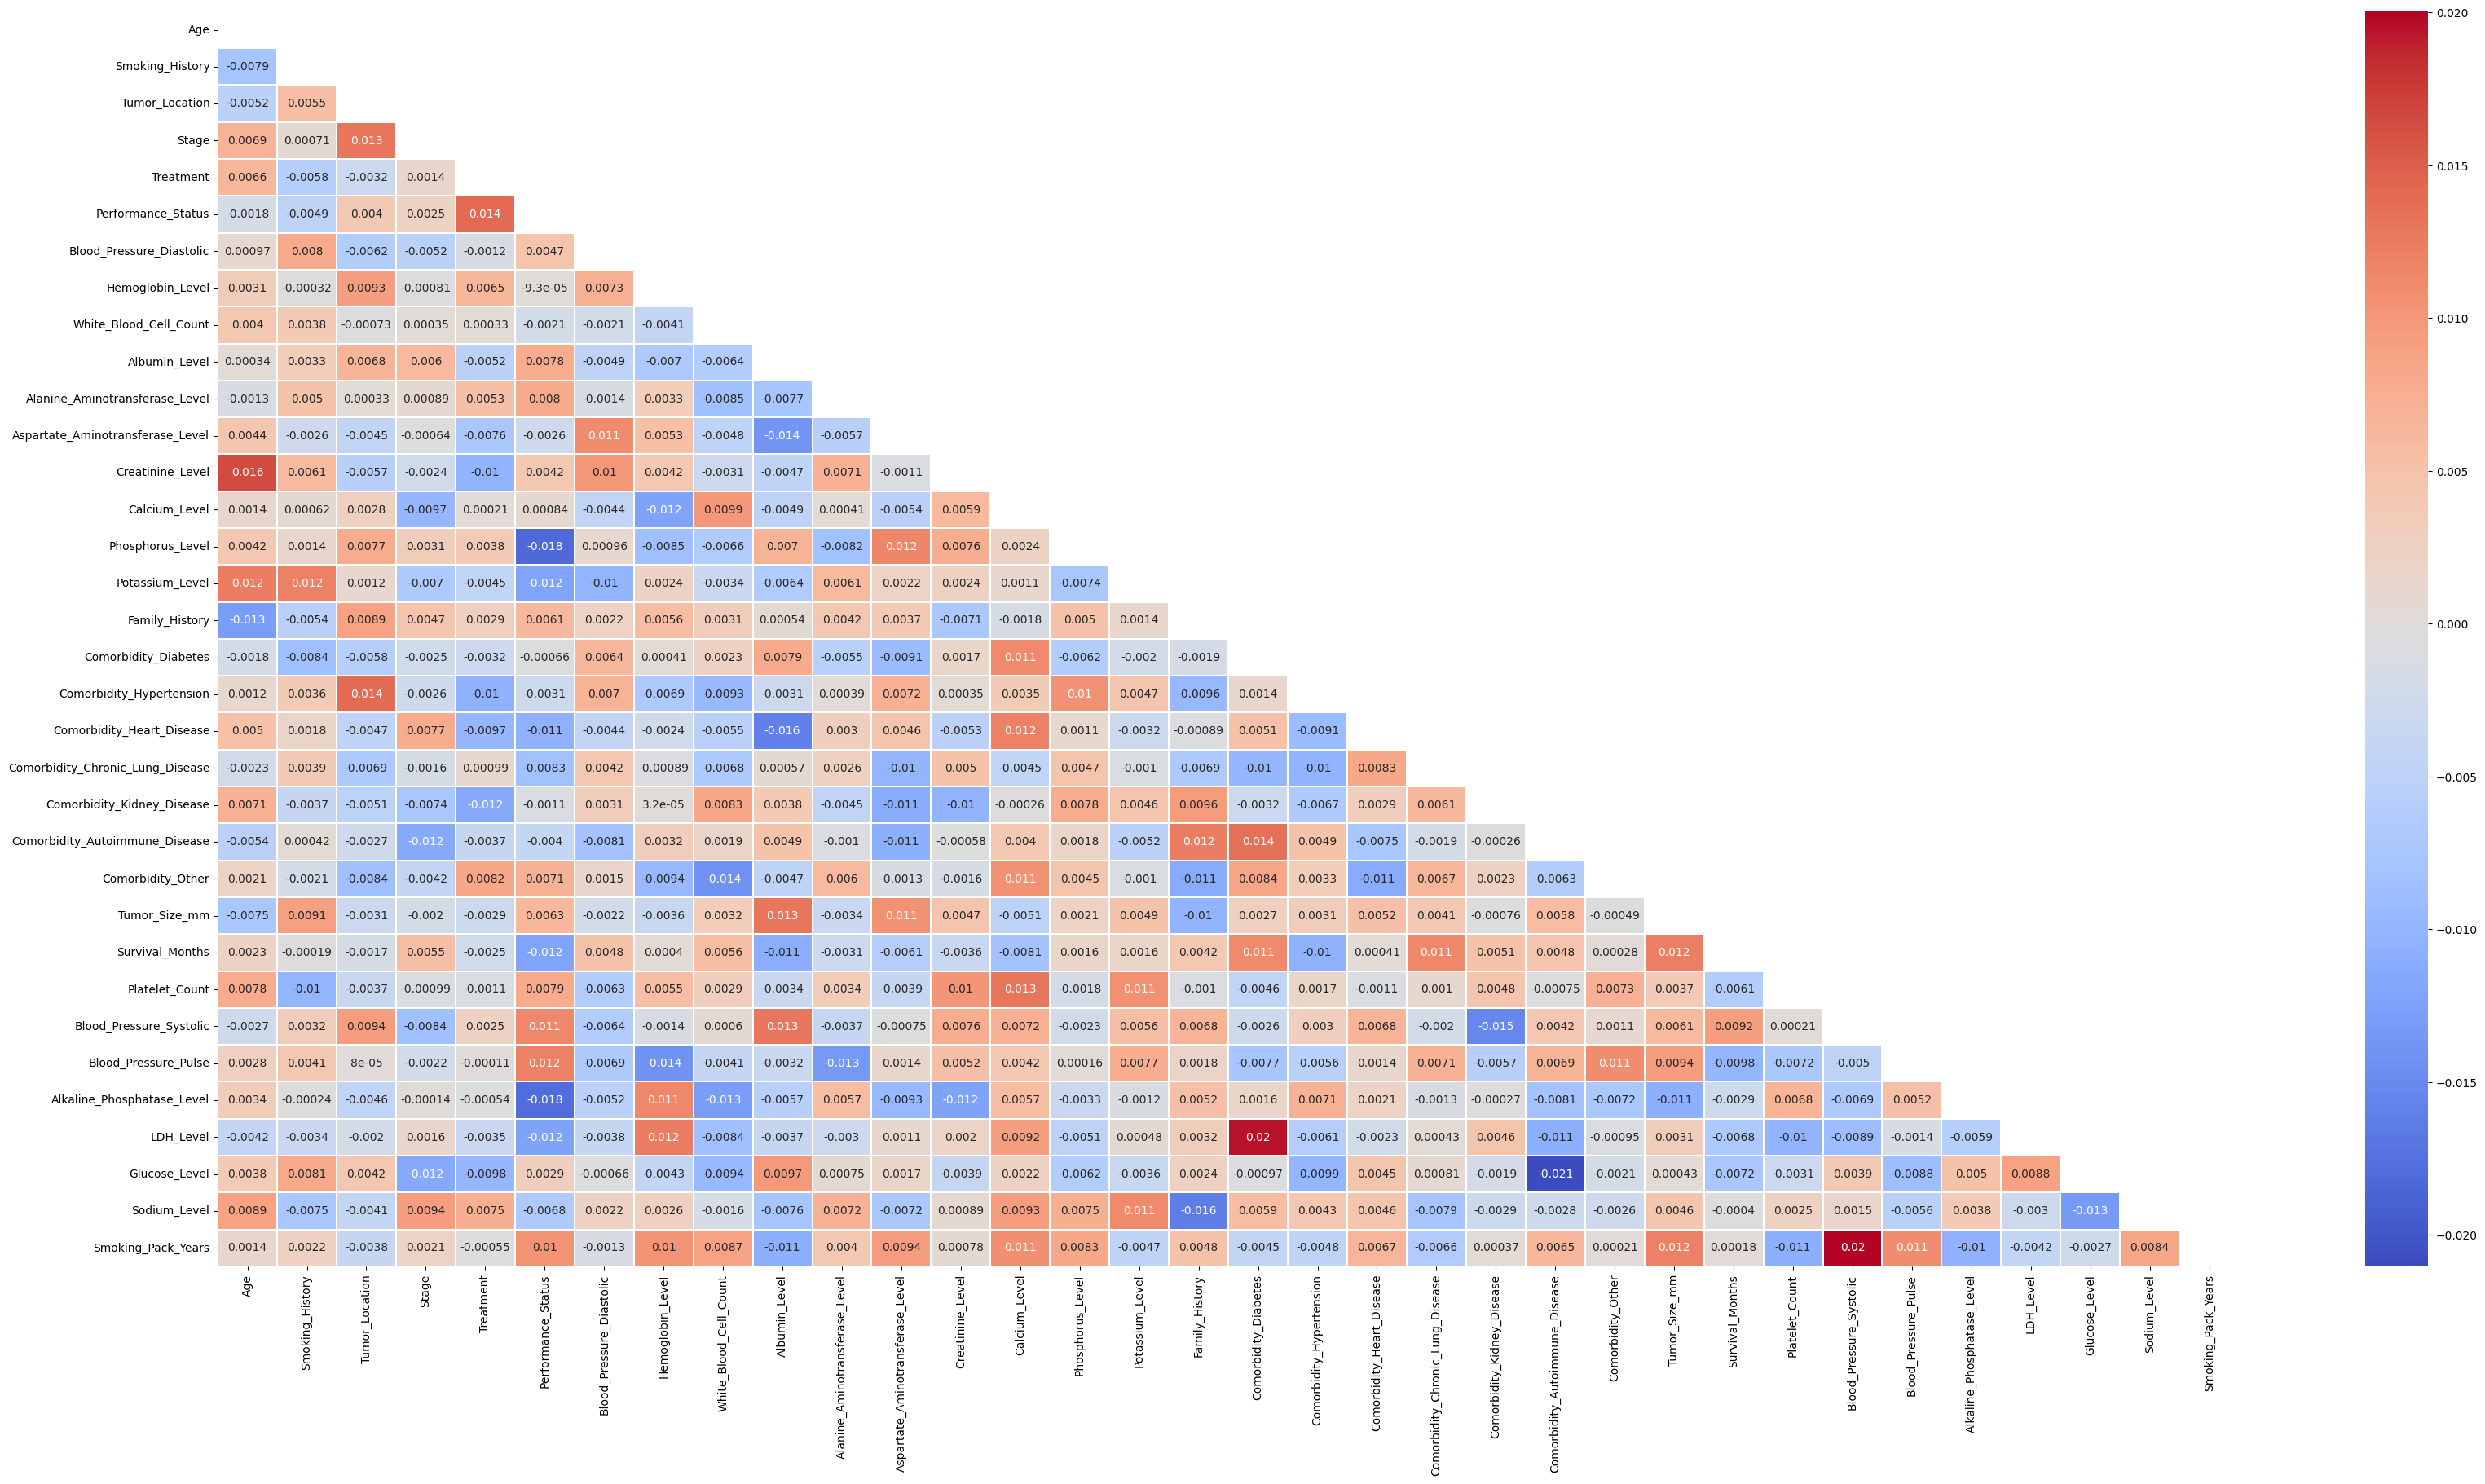

In [24]:
plt.figure(figsize=(40, 20))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, linewidth=.10, mask=matrix, cmap='coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

<Axes: ylabel='Count'>

C:\Users\nm_ma\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\nm_ma\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


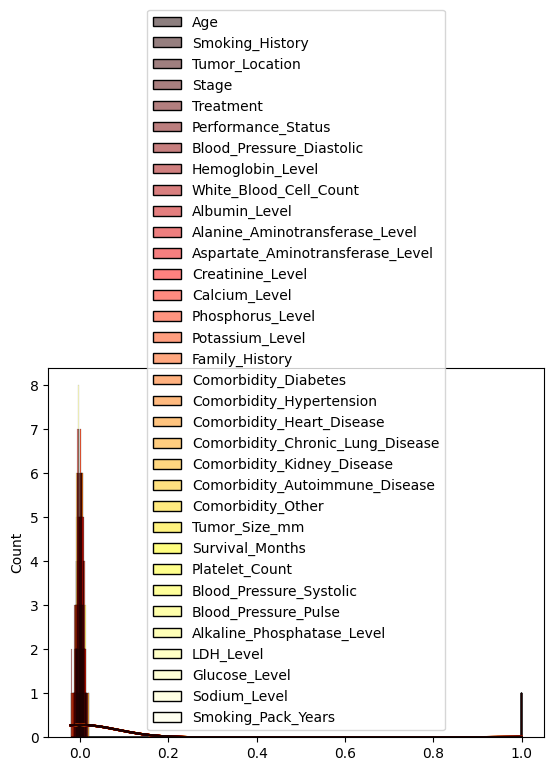

In [25]:
sns.histplot(data=df.corr(),kde=True,palette='hot')

In [27]:
#X_features = df.drop(['Stage'], axis=1)
X_features = df[['Tumor_Location','Comorbidity_Autoimmune_Disease','Glucose_Level']]
y_target = df['Stage']

In [45]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.01, random_state=None)

In [46]:
scaler_mm = MinMaxScaler()
X_train = scaler_mm.fit_transform(X_train)
X_test = scaler_mm.transform(X_test)


Random Forest

In [47]:
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
model.score(X_test, y_test)


0.2320675105485232

In [ ]:
# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')
# print('Classification Report:')
# print(report)

In [48]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[20, 13, 22, 13],
       [25,  9, 12, 12],
       [15, 19, 17, 15],
       [11, 15, 10,  9]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

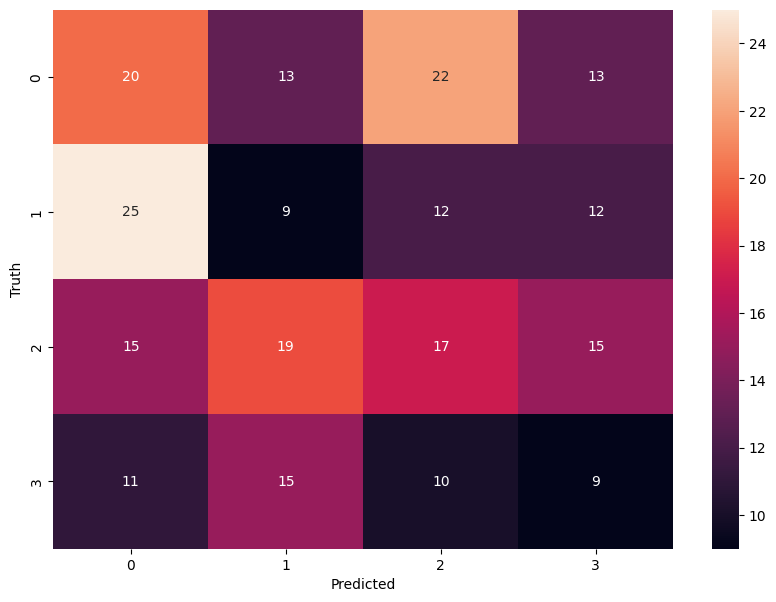

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Support Vector Machines (SVM)

In [56]:
smodel = SVC(kernel='rbf',degree=4, random_state=42)
smodel.fit(X_train, y_train)
# Make predictions
y_pred = smodel.predict(X_test)
smodel.score(X_test, y_test)

0.2742616033755274

Text(95.72222222222221, 0.5, 'Truth')

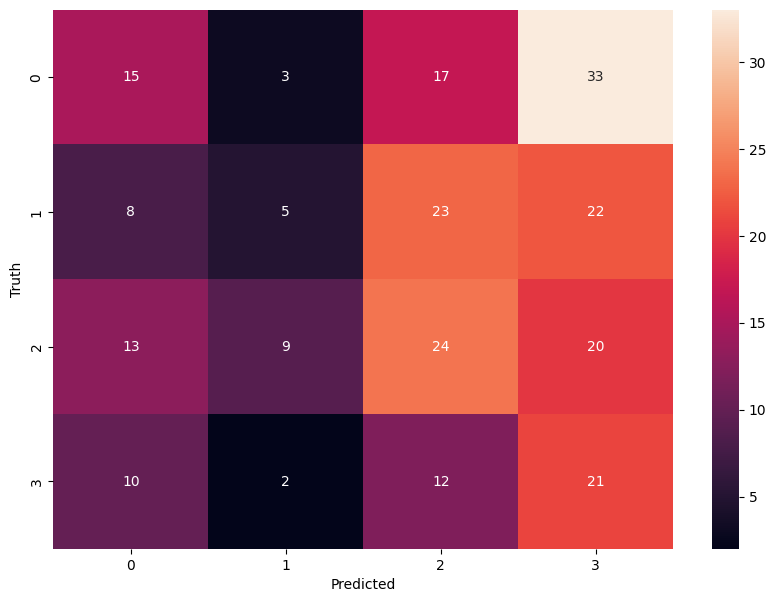

In [57]:
scm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(scm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

K-Nearest Neighbors (KNN)

In [52]:
kmodel = KNeighborsClassifier(n_neighbors=3)
kmodel.fit(X_train, y_train)
# Make predictions
y_pred = kmodel.predict(X_test)
kmodel.score(X_test, y_test)

0.22784810126582278

Text(95.72222222222221, 0.5, 'Truth')

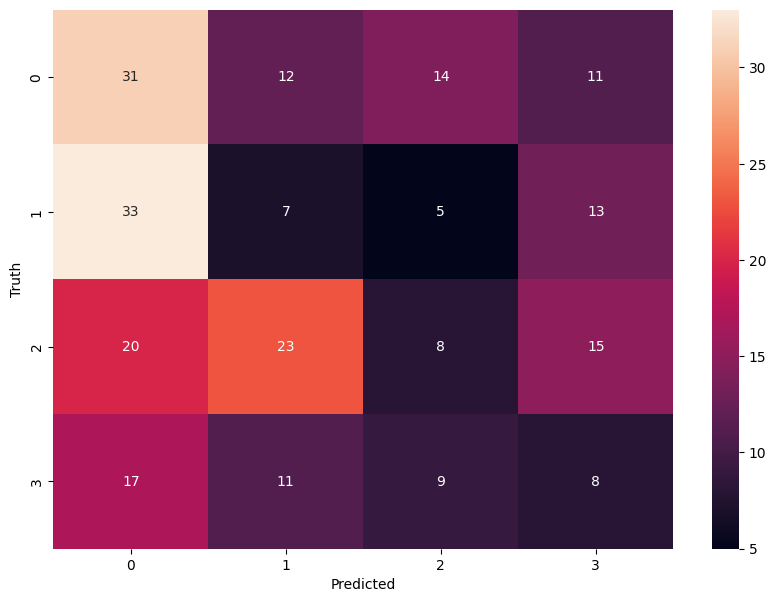

In [53]:
kcm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(kcm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Naive bayes

In [54]:
gmodel = GaussianNB()
gmodel.fit(X_train, y_train)
# Make predictions
y_pred = gmodel.predict(X_test)
gmodel.score(X_test, y_test)

0.2109704641350211

Text(95.72222222222221, 0.5, 'Truth')

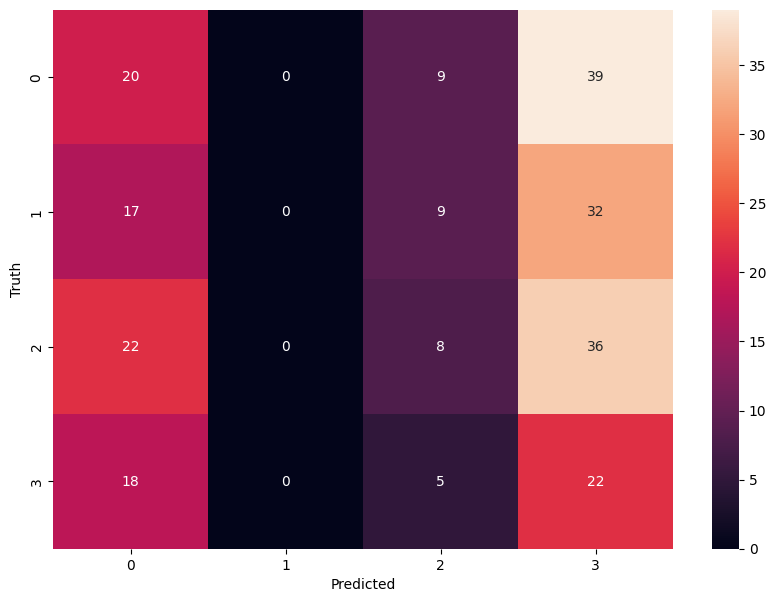

In [55]:
gcm = confusion_matrix(y_test, y_pred)
gcm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(gcm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Logistic Regression

In [42]:
Lmodel = LogisticRegression(random_state=42)
Lmodel.fit(X_train, y_train)
# Make predictions
y_pred = Lmodel.predict(X_test)
Lmodel.score(X_test, y_test)

0.2742616033755274

Text(95.72222222222221, 0.5, 'Truth')

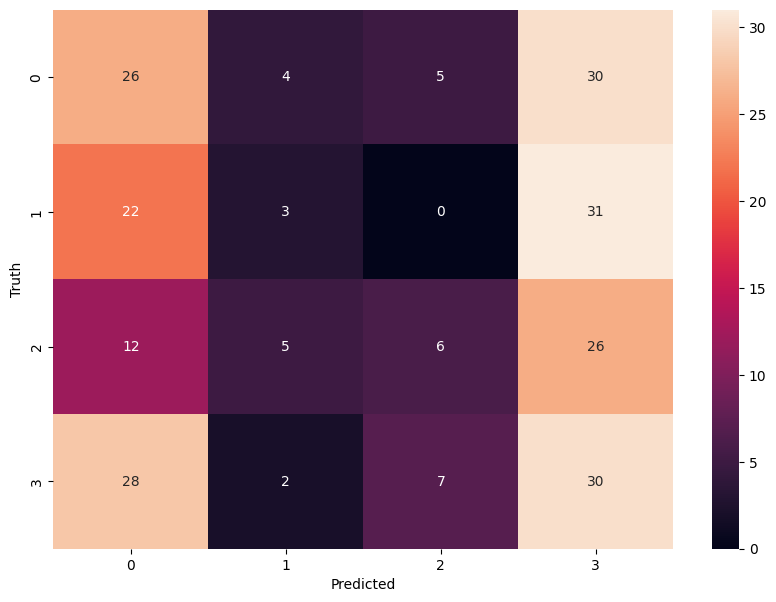

In [43]:
Lcm = confusion_matrix(y_test, y_pred)
Lcm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(Lcm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Logistic Regression
# K-Nearest Neighbors (KNN)
# Support Vector Machines (SVM)
# Decision Trees
# Random Forests
# Naive Bayes
# Linear Discriminant Analysis (LDA)